In [3]:
import os
os.getcwd()
os.chdir('/Users/chidam/Desktop')

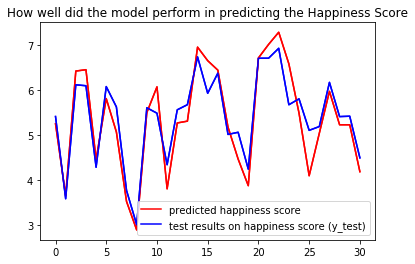

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 06 Sep 2017   Prob (F-statistic):           4.49e-52
Time:                        10:52:23   Log-Likelihood:                -109.40
No. Observations:                 155   AIC:                             230.8
Df Residuals:                     149   BIC:                             249.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7988      0.180      9.978      0.0

In [5]:
#Code - to recognize which of the predictor variables is significantly contributing to the Happiness Score


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#importing the dataset
df=pd.read_csv('happiness_score_2017.csv')
y = df.iloc[:, 2:3].values
X= df.iloc[:, 5:11].values
np.reshape(y, 155)

#splitting the dataset into training and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
plt.plot(y_test,'r')
plt.plot(y_pred, 'b')
plt.legend(['predicted happiness score', 'test results on happiness score (y_test)'], loc="best")
plt.title('How well did the model perform in predicting the Happiness Score')
plt.show()

#building the optimal model using backward elimination
import statsmodels.formula.api as sm
X=np.append(arr=np.ones((155,1)).astype(int), values=X, axis=1)
X_opt=X[:, [0,1,2,3,4,5,6]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
#print(regressor_OLS.summary())
#with trust as one of the predictors - best fit model
X_opt=X[:, [0,1,2,3,4,6]]
regressor_OLS=sm.OLS(endog=y, exog=X_opt).fit()
print(regressor_OLS.summary())
print ('Standard error values:', regressor_OLS.bse) #the std err value where The b is a historical artifact, where params were called b as in linear model #y = X b + u#
print ('Values of parameters:', regressor_OLS.params)#to print the parameters - in other words the coefficients
#you can compute condition number to check if multicollinearity exists. The value of condition number gretaer than 20 is worrisome.
#it's not an issue with collinearity but to the scaling of the explanatory variables, i.e. an eigenvalue is large because the variable is large, and some variables, like constant, are small. (statsmodels reports the condition number of the design matrix and not of a standardized design matrix.)